In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn
seaborn.mpl.rcParams['figure.figsize'] = (10.0, 6.0)
seaborn.mpl.rcParams['savefig.dpi'] = 90


np.random.seed(1)

get_px = lambda x: web.DataReader(x, 'google', start='2015-01-01', end='2017-01-01')['Close']

symbols = ['SPY','TLT','MSFT']
data = pd.DataFrame({sym:get_px(sym) for sym in symbols})
lrets = np.log(data/data.shift(1)).dropna()

## facebook prohpet : forecasting in scale

In [2]:
from fbprophet import Prophet

df_spy = data.SPY.copy().to_frame('y')
df_spy['ds'] = pd.to_datetime(df_spy.index)

prophet = Prophet()
prophet.fit(df_spy)
future = prophet.make_future_dataframe(periods=100)
display(df_spy.tail())
forecast = prophet.predict(future)
display(forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(10))

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,y,ds
Date,,
2016-12-23,225.71,2016-12-23
2016-12-27,226.27,2016-12-27
2016-12-28,224.40,2016-12-28
2016-12-29,224.35,2016-12-29
2016-12-30,223.53,2016-12-30


,ds,yhat,yhat_lower,yhat_upper
594,2017-03-31,226.238497,215.891466,237.526048
595,2017-04-01,227.491861,216.114539,238.672637
596,2017-04-02,227.543145,215.883892,238.495943
597,2017-04-03,226.471444,214.615608,237.977876
598,2017-04-04,226.432510,214.222502,237.467097
599,2017-04-05,226.684951,214.390042,237.843638
600,2017-04-06,226.847897,214.278670,238.919497
601,2017-04-07,226.597484,214.405780,238.715631
602,2017-04-08,227.850849,215.993325,239.881641
603,2017-04-09,227.902132,214.743269,240.129530


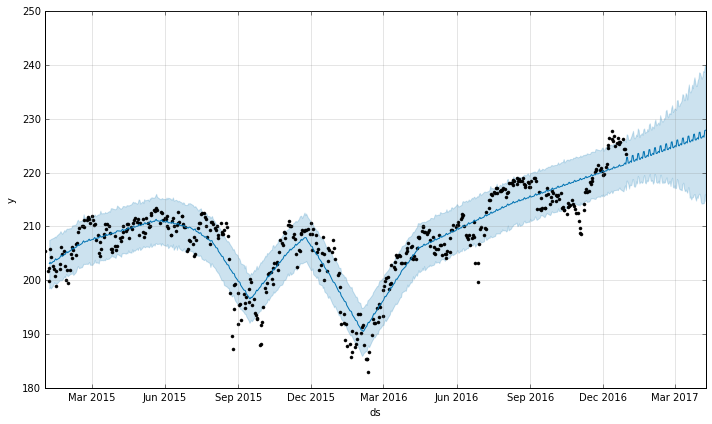

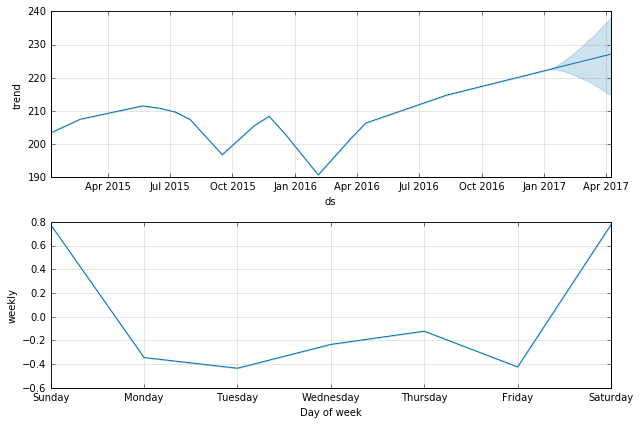

In [3]:
prophet.plot(forecast[3:])
plt.show()
prophet.plot_components(forecast[3:])
plt.show()

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


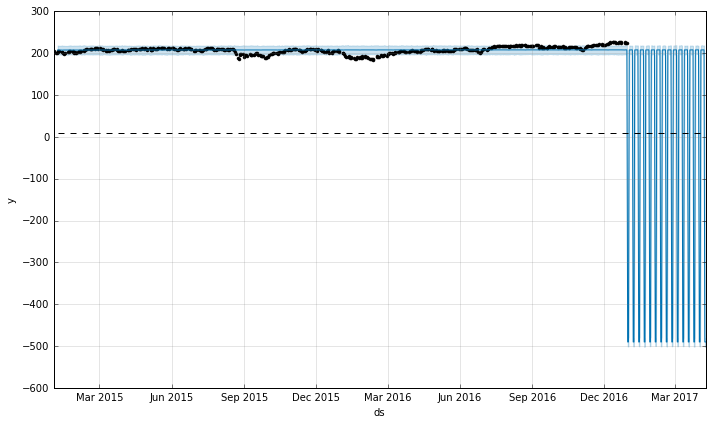

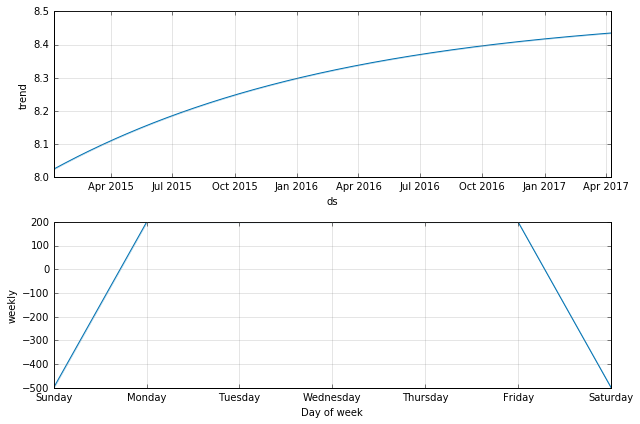

In [6]:
df_spy['cap'] = 8.5
prophet_log = Prophet(growth='logistic')
prophet_log.fit(df_spy)
future_log = prophet_log.make_future_dataframe(periods=100)
future_log['cap'] = 8.5
forecast_log = prophet_log.predict(future_log)
prophet_log.plot(forecast_log[3:])
plt.show()
prophet_log.plot_components(forecast_log[3:])
plt.show()

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


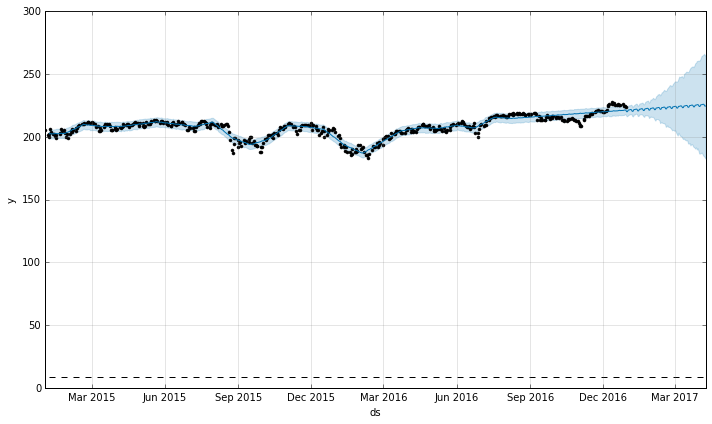

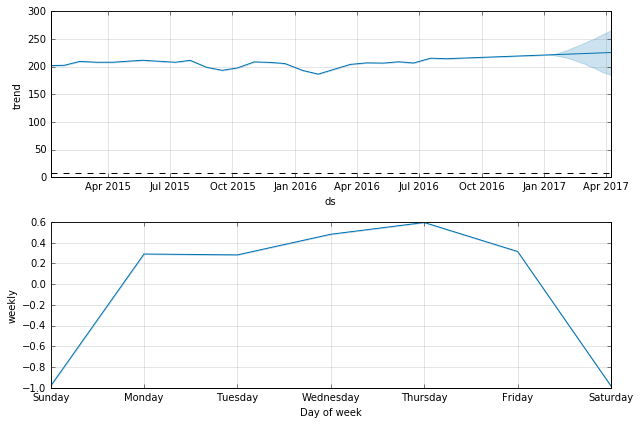

In [7]:
prophet_cp = Prophet(changepoint_prior_scale=0.5)
prophet_cp.fit(df_spy)
future_cp = prophet_cp.make_future_dataframe(periods=100)
future_cp['cap'] = 8.5
forecast = prophet_cp.predict(future_cp)
prophet_log.plot(forecast[3:])
plt.show()
prophet_cp.plot_components(forecast[3:])
plt.show()